<a href="https://colab.research.google.com/github/AusafMo/PlayStoreEDA/blob/main/Play_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# give the required permission(s) to the JSON file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download lava18/google-play-store-apps

google-play-store-apps.zip: Skipping, found more recently modified local copy (use --force to force download)


## Extract Zip

In [ ]:

import zipfile
import os

# I am prefering to extract the file to the session storage so to save the Drive Space.
zip_ref = zipfile.ZipFile('/content/google-play-store-apps.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/play') # Extracts the file into the '/brain' folder
zip_ref.close()

## EDA

In [ ]:

# Import dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/play/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Drop the rows with no ratings, this case is not suitable for imputing values, and imputing target variables is not a good idea anyways

df = df.dropna()

In [ ]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
print(f"There are {len(df['App'].unique())} unique apps with Non-Null values.")

There are 8190 unique apps with Non-Null values.


plotting graphs to observe ratings with other features


---

Text(0.5, 1.0, 'Ratings Distribution')

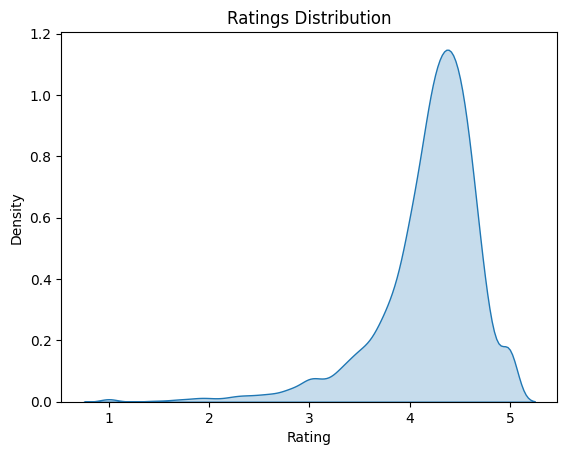

In [ ]:
sns.kdeplot( data = df, x = 'Rating', fill = True)
plt.title('Ratings Distribution')

**Observation**
<br>
The Rating is normally distributed, with its average value of 4, which is surprisingly good.

In [ ]:
print(f"The number of categories in the dataset is {len(df['Category'].unique())}")

The number of categories in the dataset is 33


(<Axes: title={'center': 'Distribution of Apps in each category'}, xlabel='Category', ylabel='count'>,
 Text(0.5, 1.0, 'Distribution of Apps in each category'))

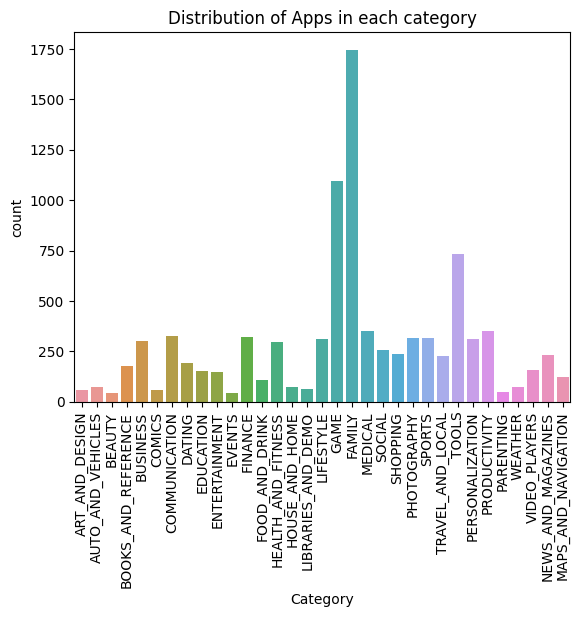

In [ ]:
# We will see the distribution of categories
fig = sns.countplot(x = 'Category', data = df)
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
fig, plt.title('Distribution of Apps in each category')

**Observation**
<br>
There are relatively more apps in the GAMES and FAMILY category.

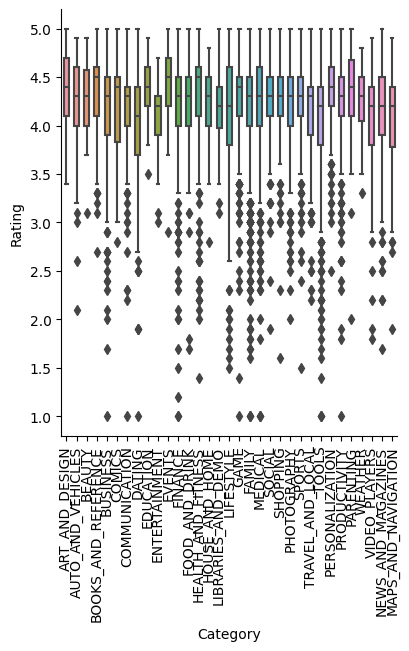

In [ ]:
fig = sns.catplot(data = df, x = 'Category', y = 'Rating', kind = 'box', width = 0.5)
fig.set_xticklabels(rotation=90)

**Observation**
<br>
The average rating across the categories are similar.

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**The issue** : we can tell ( by intuition ) that some values must me numerical and ordinal, that is, there is significance in their value, for example df['Size'] should be a numerical value, and that the size itself holds order, larger size may (dis)favours the rating. Similarly, Price, Current Ver and similar features also needs to be numerical and ordinal.
<br>

We will now handle these coloumns one by one, to make it suitable for processing.

In [ ]:
# Convert appropiate features to float

df["Rating"] = df.Rating.astype(float)
df["Reviews"] = df.Reviews.astype(float)

# # Remove '+' suffix from the 'Installs' column
# df['Installs'] = df['Installs'].astype(str).str.replace('+', '', regex = True).str.replace(',', '').astype(int)

# # Remove '$' suffix from the 'Price' column
# df['Price'] = df.Price.str.replace('$', '',regex = True).astype(float)


In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Text(0.5, 1.0, 'Review Distribution')

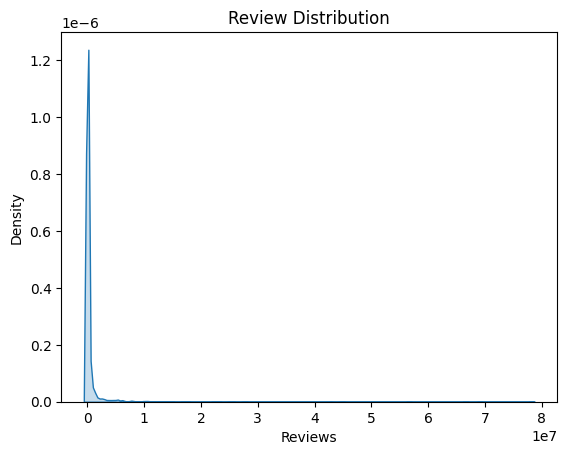

In [ ]:
fig, sns.kdeplot(data = df, x = 'Reviews', bw_adjust = .4, fill = True)
plt.title('Review Distribution')

In [ ]:
df[df['Reviews'] > 5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799.0,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854.0,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


most of the applications have under a million reviews

**SIZE**

In [ ]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

**Observation**
<br>
There are more than one formats of size, like 'k' and 'M' and some sizes are labelled to denote 'varies with device'. Moreover, its in object type.

In [ ]:
len(df[df.Size == 'Varies with device'])

1637

In [ ]:
# change it to NA first

df['Size'].replace('Varies with device', np.nan, inplace = True )

In [ ]:
# Convert the Kbs into Mb
def convert(size):
  if pd.isnull(size):
    return size
  elif 'k' in size :
    size = float(size.replace('k', ''))/1024
  else :
    size = float(size.replace('M', ''))
  return size

df['Size'] = df['Size'].apply(convert)

# We will impute the missing value with the average app size in its category
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'), inplace = True)

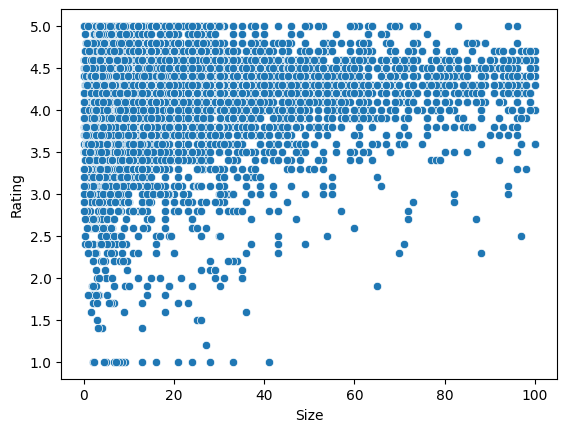

In [ ]:
fig = sns.scatterplot( x = 'Size', y = 'Rating', data = df)

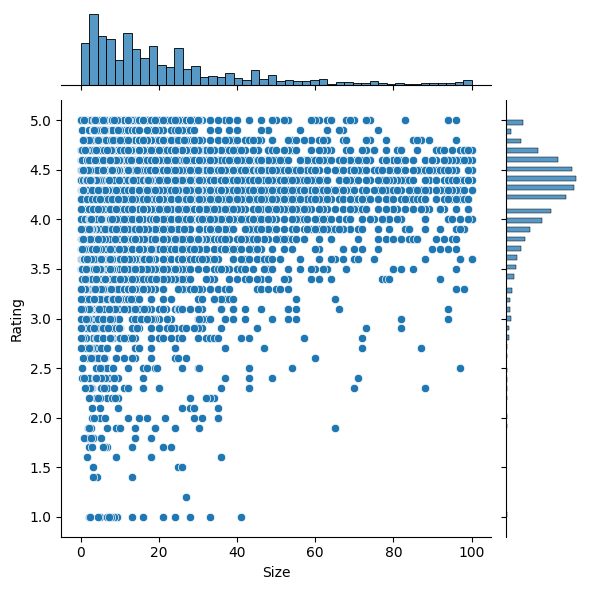

In [ ]:
fig = sns.jointplot(x = 'Size', y = 'Rating', data = df)

**Installs**

In [ ]:
df.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

Data is in object with '+' sign.

In [ ]:
df['Installs'] = df['Installs'].astype(str).str.replace('+', '', regex = True)
df.Installs = df.Installs.astype(str).str.replace(',' , '')
df.Installs = df.Installs.astype(int)

In [ ]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [ ]:
df.Installs.value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating vs Installs')

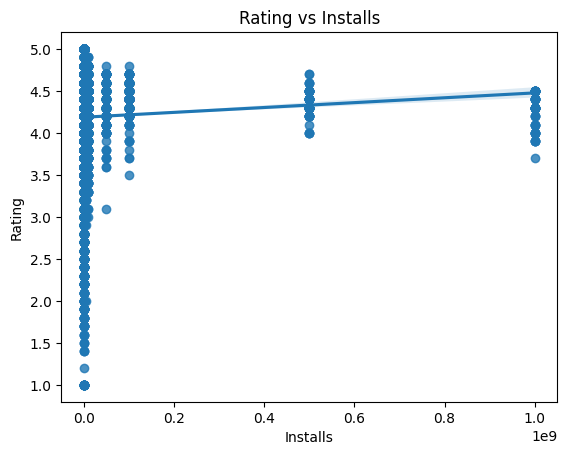

In [ ]:
fig = sns.regplot( x = 'Installs', y = 'Rating', data = df)
plt.title('Rating vs Installs')

Ratings increase as Installs increase.

**Type**

In [ ]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
free = len(df[df['Type'] == 'Free'])*100/ len(df)
print(f'Over {free} % of apps are free.')

Over 93.10897435897436 % of apps are free.


**Price**

In [ ]:
df['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [ ]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
df.Price = df.Price.astype(str).str.replace('$', '', regex = True)
df.Price = df.Price.astype(float)
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [ ]:
print(f'The most expensive app is {max(df.Price)} dollars with an average price of {np.mean(df.Price)} dollars.')

The most expensive app is 400.0 dollars with an average price of 0.9612788461538462 dollars.


Text(0.5, 1.0, 'Rating vs Price')

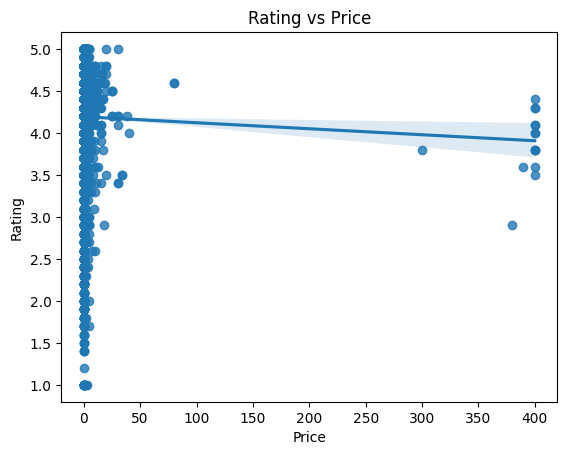

In [ ]:
fig = sns.regplot(x = 'Price', y = 'Rating', data = df)
plt.title('Rating vs Price')

It looks like on an average the customer interaction and ratings go slightly down with increase in price.

**Content Rating**

In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

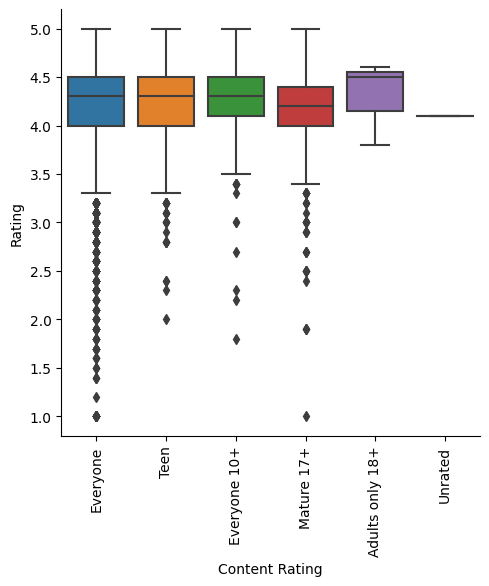

In [ ]:
fig = sns.catplot( x = 'Content Rating', y = 'Rating', data = df, kind = 'box')
fig.set_xticklabels(rotation = 90)

Content Rating doesnt seem to affect too much rating.
<br>
So i decided to drop Content Rating.

In [ ]:
df.drop(['Content Rating'], axis = 1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.000000,10000,Free,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.000000,500000,Free,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.700000,5000000,Free,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.000000,50000000,Free,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.800000,100000,Free,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.600000,500,Free,0.0,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.000000,5000,Free,0.0,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.600000,100,Free,0.0,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,14.386035,1000,Free,0.0,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Genres**

In [ ]:
df.Genres.value_counts()

Tools                      732
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: Genres, Length: 115, dtype: int64

In [ ]:
df.Genres.describe()

count      9360
unique      115
top       Tools
freq        732
Name: Genres, dtype: object

In [ ]:
df['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [ ]:
df[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,115.000000
mean,4.259580
std,0.182310
min,3.800000
25%,4.151179
50%,4.266667
75%,4.358333
max,4.800000


Across the Genres the std of Ratings is minimal, thus indicates low effects.

Text(0.5, 1.0, 'Rating vs Genres')

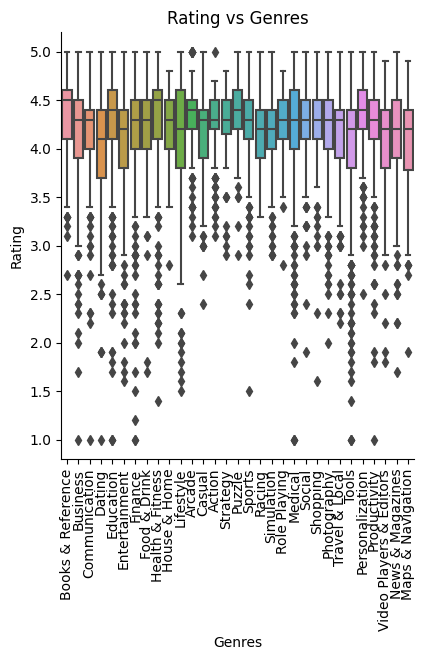

In [ ]:
cat_counts = df.Genres.value_counts()

sig_counts = cat_counts[cat_counts > 75].index
plot_df = df[df['Genres'].isin(sig_counts)]

fig = sns.catplot( x = 'Genres', y = 'Rating', data = plot_df, kind = 'box')
fig.set_xticklabels(rotation = 90)
plt.title('Rating vs Genres')

# ML to predict app ratings

Encoding the data

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**category**

In [ ]:
df = pd.get_dummies(df, columns = ['Category'])

In [ ]:
# Dropping these (less signigicant)columns as a design choice
df.drop(['Current Ver','Last Updated','Android Ver'], axis = 1, inplace = True)

**Content Rating**

In [ ]:
df = pd.get_dummies(df, columns = ['Content Rating'])

**Type**

In [ ]:
df['Free'] = df['Type'].map(lambda s :1  if s =='Free' else 0)
df.drop(['Type'], axis=1, inplace=True)

**Installs**

In [ ]:
unq = sorted(list(df['Installs'].unique()))

In [ ]:
#Encoding
df['Installs'].replace(unq, range(0, len(unq), 1), inplace = True )

**Price**

In [ ]:
# Put prices into bands

df.loc[df['Price'] == 0, 'priceint'] = '0'
df.loc[(df['Price'] > 0) & (df['Price'] <= 1), 'priceint'] = '1'
df.loc[(df['Price'] > 1) & (df['Price'] <= 3), 'priceint']   = '2'
df.loc[(df['Price'] > 3) & (df['Price'] <= 5), 'priceint']   = '3'
df.loc[(df['Price'] > 5) & (df['Price'] <= 15), 'priceint']   = '4'
df.loc[(df['Price'] > 15), 'priceint']  = '5'

0 = Free
1 = Cheap
2 = Normal
3 = Medium Price
4 = Expensive
5 = Too expensive

In [ ]:
df.priceint.value_counts()

0    8715
2     240
3     157
1     108
4      94
5      46
Name: priceint, dtype: int64

Rating

In [ ]:
# Put the Rating into bands too, cant predict in floats
df.loc[df['Rating'] < 0.5,'Ratingint'] = '0'
df.loc[(df['Rating'] >= 0.5) & (df['Rating'] < 1.5),'Ratingint'] = '1'
df.loc[(df['Rating'] >= 1.5) & (df['Rating'] < 2.5),'Ratingint'] = '2'
df.loc[(df['Rating'] >= 2.5) & (df['Rating'] < 3.5),'Ratingint'] = '3'
df.loc[(df['Rating'] >= 3.5) & (df['Rating'] < 4.5),'Ratingint'] = '4'
df.loc[(df['Rating'] >= 4.5) & (df['Rating'] < 5),'Ratingint'] = '5'


In [ ]:
df.head()

,App,Rating,Reviews,Size,Installs,Price,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Free,priceint,Ratingint
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159.0,19.0,8,0.0,Art & Design,1,0,0,...,0,0,1,0,0,0,0,1,0,4
1,Coloring book moana,3.9,967.0,14.0,11,0.0,Art & Design;Pretend Play,1,0,0,...,0,0,1,0,0,0,0,1,0,4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510.0,8.7,13,0.0,Art & Design,1,0,0,...,0,0,1,0,0,0,0,1,0,5
3,Sketch - Draw & Paint,4.5,215644.0,25.0,15,0.0,Art & Design,1,0,0,...,0,0,0,0,0,1,0,1,0,5
4,Pixel Draw - Number Art Coloring Book,4.3,967.0,2.8,10,0.0,Art & Design;Creativity,1,0,0,...,0,0,1,0,0,0,0,1,0,4


In [ ]:
df.dropna(how = 'any', inplace = True)
df["Ratingint"]=df["Ratingint"].astype(int)

In [ ]:
df.Ratingint.dtype

dtype('int64')

In [ ]:
# we do one hot encoding for Genres
df = pd.get_dummies(df, columns = ['Genres'])

In [ ]:
# Dropping columns with low effects on Rating and the target variable, as explored in EDA
df.drop(['App','Reviews','Installs', 'Rating'],axis = 1 ,inplace = True)

In [ ]:
df.corr()

,Size,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
Size,1.000000,-0.026540,-0.036137,-0.004976,-0.022661,-0.053205,-0.064656,-0.036188,-0.090770,-0.030015,...,-0.194152,-0.006975,0.020722,-0.007308,-0.001007,-0.040520,0.000175,-0.000809,-0.039185,0.037588
Price,-0.026540,1.000000,-0.004467,-0.005336,-0.004156,-0.007559,-0.008049,-0.004803,-0.009610,-0.007786,...,-0.012607,-0.000640,-0.007987,-0.000640,-0.003330,-0.007565,-0.000905,-0.001108,-0.003334,-0.003391
Category_ART_AND_DESIGN,-0.036137,-0.004467,1.000000,-0.007338,-0.005556,-0.011325,-0.014672,-0.006421,-0.015653,-0.011883,...,-0.023828,-0.000855,-0.012903,-0.000855,-0.004451,-0.010846,-0.001210,-0.001482,-0.007438,-0.004533
Category_AUTO_AND_VEHICLES,-0.004976,-0.005336,-0.007338,1.000000,-0.006133,-0.012501,-0.016195,-0.007087,-0.017278,-0.013117,...,-0.026302,-0.000944,-0.014243,-0.000944,-0.004913,-0.011972,-0.001335,-0.001636,-0.008211,-0.005004
Category_BEAUTY,-0.022661,-0.004156,-0.005556,-0.006133,1.000000,-0.009466,-0.012263,-0.005367,-0.013083,-0.009932,...,-0.019916,-0.000715,-0.010785,-0.000715,-0.003720,-0.009066,-0.001011,-0.001238,-0.006217,-0.003789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Genres_Video Players & Editors,-0.040520,-0.007565,-0.010846,-0.011972,-0.009066,-0.018479,-0.023939,-0.010476,-0.025540,-0.019389,...,-0.038879,-0.001396,-0.021053,-0.001396,-0.007263,1.000000,-0.001974,-0.002418,-0.012137,-0.007396
Genres_Video Players & Editors;Creativity,0.000175,-0.000905,-0.001210,-0.001335,-0.001011,-0.002061,-0.002670,-0.001168,-0.002849,-0.002163,...,-0.004337,-0.000156,-0.002348,-0.000156,-0.000810,-0.001974,1.000000,-0.000270,-0.001354,-0.000825
Genres_Video Players & Editors;Music & Video,-0.000809,-0.001108,-0.001482,-0.001636,-0.001238,-0.002524,-0.003270,-0.001431,-0.003489,-0.002649,...,-0.005311,-0.000191,-0.002876,-0.000191,-0.000992,-0.002418,-0.000270,1.000000,-0.001658,-0.001010
Genres_Weather,-0.039185,-0.003334,-0.007438,-0.008211,-0.006217,-0.012673,-0.016417,-0.007184,-0.017515,-0.013297,...,-0.026663,-0.000957,-0.014438,-0.000957,-0.004981,-0.012137,-0.001354,-0.001658,1.000000,-0.005072


Feature Selection/Engineering

In [ ]:
X = df.drop('Ratingint',axis=1)
y = df['Ratingint'].values
y = y.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
df.dtypes

Size                                            float64
Price                                           float64
Category_ART_AND_DESIGN                           uint8
Category_AUTO_AND_VEHICLES                        uint8
Category_BEAUTY                                   uint8
                                                 ...   
Genres_Video Players & Editors                    uint8
Genres_Video Players & Editors;Creativity         uint8
Genres_Video Players & Editors;Music & Video      uint8
Genres_Weather                                    uint8
Genres_Word                                       uint8
Length: 159, dtype: object

In [ ]:
# Standardising the df, making the values centered around a mean value of 0 and std of 1
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
df.head()

,Size,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,19.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.7,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.8,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training and Model

**Logistic Regression**

In [ ]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mat = confusion_matrix(y_test, lr_pred)
lr_accu = accuracy_score(y_test, lr_pred)
print(lr_accu)

0.6287128712871287


**Decision Tree Classifier**

In [ ]:
dtree_c = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred = dtree_c.predict(X_test)
dtree_cm = confusion_matrix(y_test,dtree_pred)
dtree_ac = accuracy_score(dtree_pred,y_test)

In [ ]:
print('DecisionTree_Classifier_accuracy:',dtree_ac)

DecisionTree_Classifier_accuracy: 0.594059405940594


**Random Forest**

In [ ]:
rdf_c=RandomForestClassifier(n_estimators=10,criterion = 'entropy',random_state=0)
rdf_c.fit(X_train, y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test, rdf_pred)
rdf_ac=accuracy_score(rdf_pred, y_test)

In [ ]:
print('RandomForest_accuracy:', rdf_ac)

RandomForest_accuracy: 0.5984598459845984


We saw that Random Forest and Decision Trees classifiers performed similar, where as Logistic Regressionn gave better results.